In [2]:
### Loading the train data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
PTSD = pd.read_csv("train_data.csv").T

# Display the first few rows of the data
print(PTSD.head())



             0            1            2             3             4    \
SpotID       NaN          1.0          2.0           3.0           4.0   
Paths        NaN        '7,3'      '12,10'        '14,7'       '15,13'   
1       Controls  0.634500122  0.040247757  -0.124132483    0.01591319   
2       Controls  0.693178185  0.177114248   -0.03335924   0.045934904   
3       Controls  0.813606086  0.510911148  -0.163050672  -0.179468703   

                 5             6            7            8             9    \
SpotID           5.0           6.0          7.0          8.0           9.0   
Paths        '16,10'       '17,13'       '19,5'       '19,9'       '19,16'   
1       -0.076297328   0.177880029  0.660559023  0.662783437  -0.120659069   
2       -0.068064456   0.037991708  0.654072723  0.708632869  -0.111098011   
3       -0.046639269  -0.104351945  0.547476323  0.305571721  -0.488731245   

        ...           668          669          670           671  \
SpotID  ...      

In [3]:
# Reset index to make row indices numeric again and keep column headers consistent
PTSD.reset_index(drop=True, inplace=True)
# Set the column names to the second row's values
PTSD.columns = PTSD.iloc[1].astype(str)

In [4]:
# Drop the first two rows
PTSD = PTSD.drop(index=[0, 1])

In [5]:
X = PTSD.iloc[:, 1:].apply(pd.to_numeric)

# Combine the first column and numeric values into a new DataFrame
PTSD = pd.concat([PTSD.iloc[:, 0].reset_index(drop=True), X.reset_index(drop=True)], axis=1)
PTSD.columns = ['Group'] + list(PTSD.columns[1:])  # Rename the first column as needed

# Reset row indices to be sequential
PTSD.index = range(1, len(PTSD) + 1)

# Replace category names with 0 and 1
PTSD['Group'] = PTSD['Group'].replace({"Controls": 0, "PCS_PTSD": 1, "PTSD": 1})

# Separate X (features) and y (target)
X = PTSD.iloc[:, 1:].astype(float)  # All columns except the first, as features
y = PTSD['Group'].astype(int)       # The first column as the target

# Optionally, display the processed data
print(X.head())
print(y.head())

      '7,3'   '12,10'    '14,7'   '15,13'   '16,10'   '17,13'    '19,5'  \
1  0.634500  0.040248 -0.124132  0.015913 -0.076297  0.177880  0.660559   
2  0.693178  0.177114 -0.033359  0.045935 -0.068064  0.037992  0.654073   
3  0.813606  0.510911 -0.163051 -0.179469 -0.046639 -0.104352  0.547476   
4  0.786855  0.539731 -0.200911 -0.077494 -0.056618 -0.173015  0.595295   
5  0.780945 -0.086844 -0.376769 -0.154598 -0.034252 -0.055639  0.597150   

     '19,9'   '19,16'    '20,6'  ...  '124,99'  '124,104'  '124,108'  \
1  0.662783 -0.120659  0.094495  ...  0.288274   0.628563   0.444534   
2  0.708633 -0.111098  0.006496  ...  0.160425   0.667858   0.459182   
3  0.305572 -0.488731 -0.003336  ... -0.133436   0.385106   0.062017   
4  0.193215 -0.319023  0.059861  ... -0.116021   0.340279   0.017129   
5  0.281572  0.156339  0.438510  ... -0.249180   0.355558  -0.251926   

   '125,44'  '125,88'  '125,90'  '125,95'  '125,97'  '125,111'  '125,115'  
1  0.709645 -0.543708  0.399522 -0.49989

C:\Users\yagmu\AppData\Local\Temp\ipykernel_7428\2039118031.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PTSD['Group'] = PTSD['Group'].replace({"Controls": 0, "PCS_PTSD": 1, "PTSD": 1})


In [7]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Group        0
'7,3'        0
'12,10'      0
'14,7'       0
'15,13'      0
            ..
'125,90'     0
'125,95'     0
'125,97'     0
'125,111'    0
'125,115'    0
Length: 678, dtype: int64

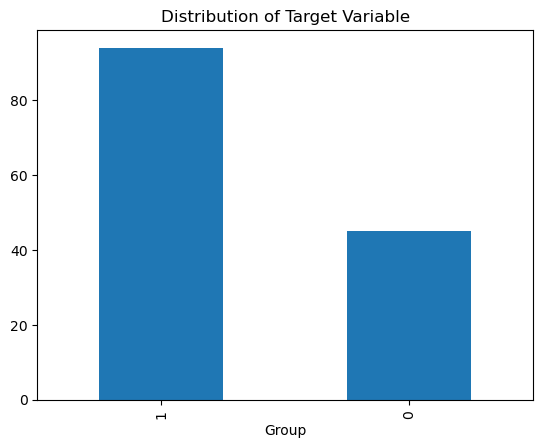

In [8]:
y.value_counts().plot(kind='bar', title='Distribution of Target Variable')
PTSD.describe
PTSD.isnull().sum()
#X.hist(figsize=(15, 10))

Text(0.5, 1.0, 'Correlation Heatmap')

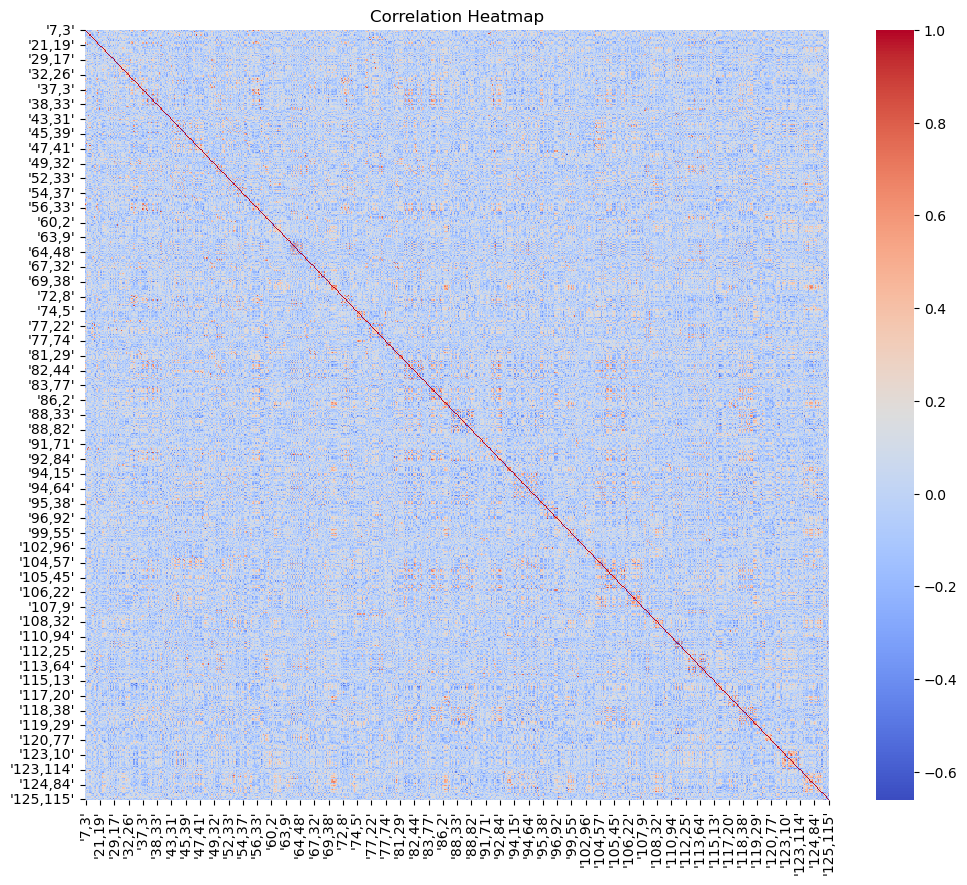

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")


In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

In [ ]:
# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# Initialize variables to store the best model and parameters
best_model = None
best_params = None
best_accuracy = 0

# Iterate over all combinations of parameters
for params in ParameterGrid(param_grid):
    # Create and train the model with the current parameters
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    # Update the best model if this one is better
    if accuracy > best_accuracy:
        best_model = model
        best_params = params
        best_accuracy = accuracy

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Validation Accuracy:", best_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Validation Accuracy: 0.8928571428571429


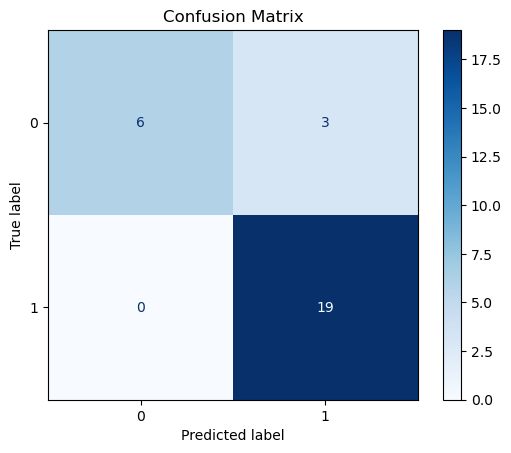

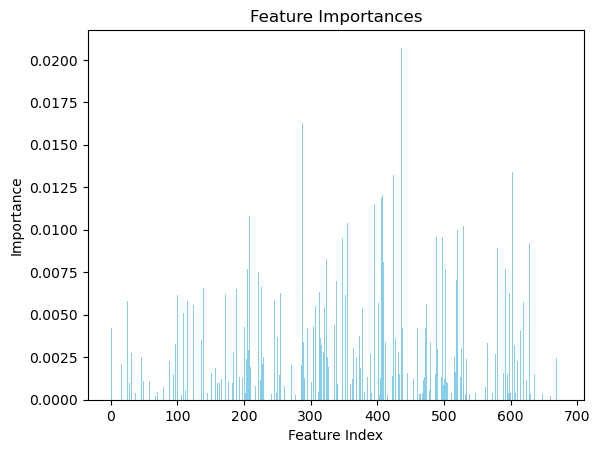

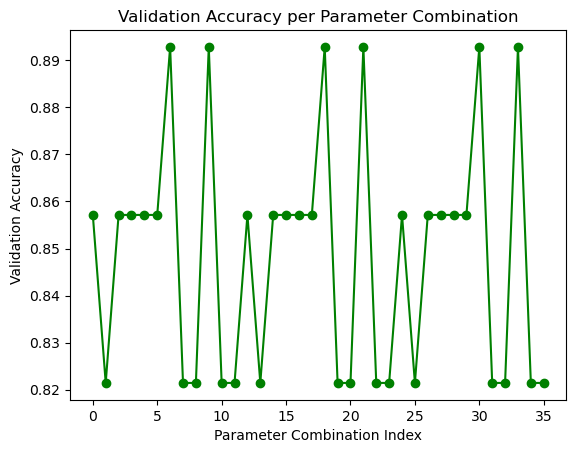

In [13]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
y_val_pred = best_model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
feature_importances = best_model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Plot validation accuracy per parameter combination (optional for better insights)
accuracies = []
params_list = list(ParameterGrid(param_grid))

for params in params_list:
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

plt.plot(range(len(params_list)), accuracies, marker="o", color="green")
plt.xlabel("Parameter Combination Index")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy per Parameter Combination")
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': np.float64(166.81005372000558)}
Best Cross-Validation Accuracy: 0.9458498023715414


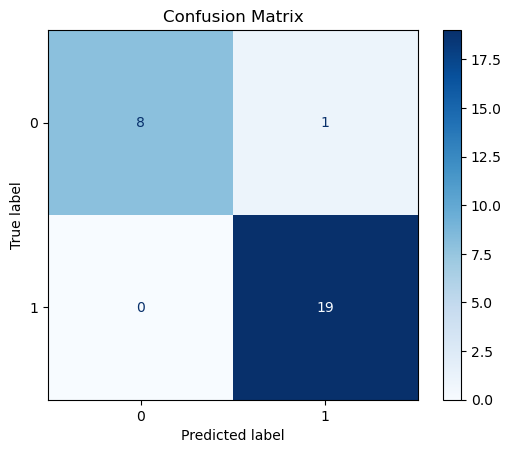

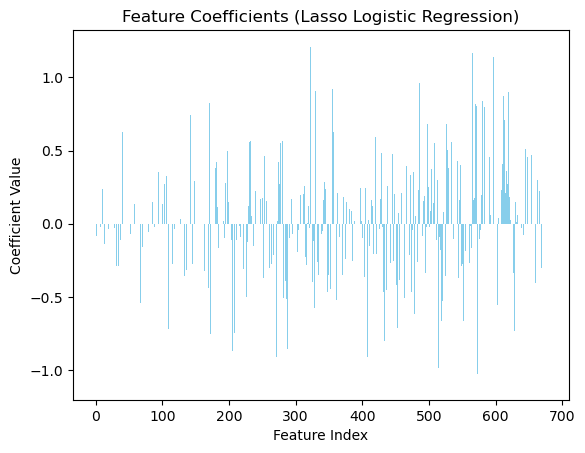

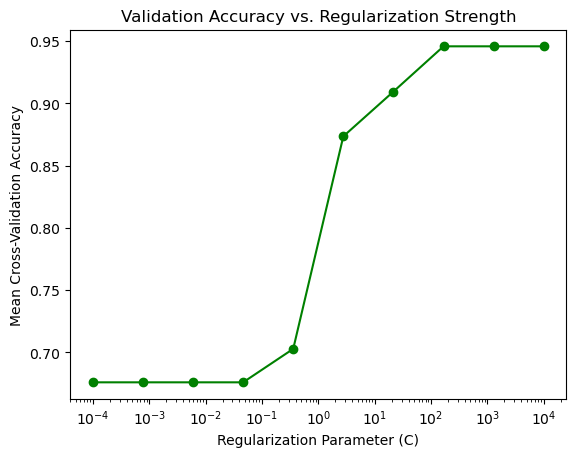

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for the regularization parameter (C)
param_grid = {"C": np.logspace(-4, 4, 10)}

# Perform Grid Search with Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
grid_search = GridSearchCV(lasso_model, param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_lasso_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)

# Predict on validation set
y_val_pred = best_lasso_model.predict(X_val)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot Coefficients
coefficients = best_lasso_model.coef_.flatten()
plt.bar(range(len(coefficients)), coefficients, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Lasso Logistic Regression)")
plt.show()

# Plot validation accuracy per parameter combination
results = grid_search.cv_results_
param_values = results["param_C"].data  # Regularization values
mean_scores = results["mean_test_score"]  # Mean accuracy

plt.semilogx(param_values, mean_scores, marker='o', color='green')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Validation Accuracy vs. Regularization Strength")
plt.show()

Features Selected by Lasso Logistic Regression: ['Feature 1', 'Feature 2', 'Feature 6', 'Feature 8', 'Feature 10', 'Feature 11', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 19', 'Feature 20', 'Feature 22', 'Feature 24', 'Feature 27', 'Feature 29', 'Feature 30', 'Feature 31', 'Feature 32', 'Feature 34', 'Feature 35', 'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39', 'Feature 41', 'Feature 42', 'Feature 43', 'Feature 49', 'Feature 52', 'Feature 53', 'Feature 54', 'Feature 55', 'Feature 57', 'Feature 58', 'Feature 59', 'Feature 63', 'Feature 64', 'Feature 66', 'Feature 67', 'Feature 68', 'Feature 69', 'Feature 71', 'Feature 75', 'Feature 78', 'Feature 79', 'Feature 80', 'Feature 81', 'Feature 84', 'Feature 86', 'Feature 87', 'Feature 88', 'Feature 89', 'Feature 93', 'Feature 94', 'Feature 95', 'Feature 99', 'Feature 101', 'Feature 102', 'Feature 103', 'Feature 104', 'Feature 106', 'Feature 107', 'Feature 110', 'Feature 115', 'Feature 116', 'Feature 118', 'Feature 119', 'Featu

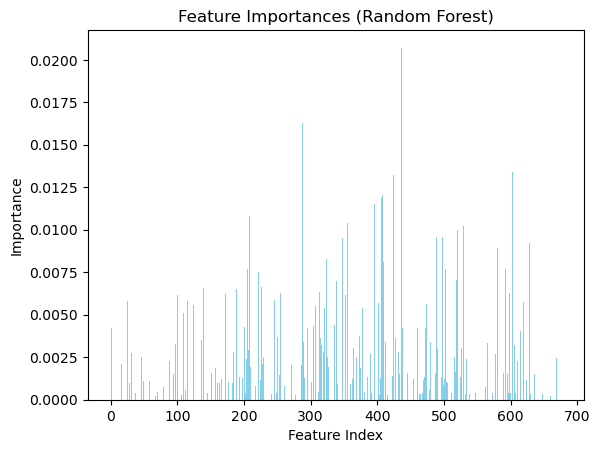

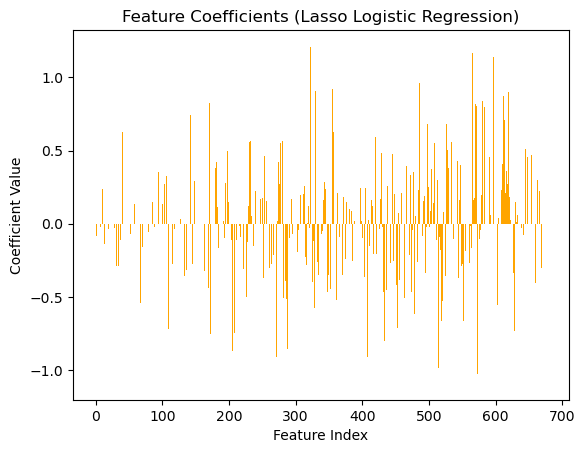

In [17]:

# Feature names
feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]

# 1. Features selected by Lasso Logistic Regression (non-zero coefficients)
lasso_coefficients = best_lasso_model.coef_.flatten()
lasso_selected_features = [feature_names[i] for i, coef in enumerate(lasso_coefficients) if coef != 0]

print("Features Selected by Lasso Logistic Regression:", lasso_selected_features)

# 2. Features selected by Random Forest (non-zero importance)
rf_feature_importances = best_model.feature_importances_
rf_selected_features = [feature_names[i] for i, importance in enumerate(rf_feature_importances) if importance > 0]

print("Features Selected by Random Forest:", rf_selected_features)

# 3. Compare Features
common_features = set(lasso_selected_features).intersection(rf_selected_features)
print("Common Features Selected by Both Models:", list(common_features))

# Optional: Plot Feature Importance for Random Forest
plt.bar(range(len(rf_feature_importances)), rf_feature_importances, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()

# Optional: Plot Coefficients for Lasso Logistic Regression
plt.bar(range(len(lasso_coefficients)), lasso_coefficients, color='orange')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Lasso Logistic Regression)")
plt.show()